In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/lilfakeS/MBAN5110_group/main/dataset_lm.csv')

In [4]:
data.head(5)

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
0,56.293458,13.698667,50.639873,0,-18.568035,45.121911,11.412501,56.410757,2,-12.281132,38.996909,-3.010548,49.195073,0,-21.153143,46.919314
1,58.473431,2.714725,65.845845,1,-25.105932,47.190213,10.080280,65.383107,3,-36.763585,51.654939,4.991111,45.591729,0,-6.474403,53.383508
2,94.195330,11.618072,65.072497,0,-7.897464,52.163036,11.057301,82.812717,0,-15.733547,48.913837,-2.457696,56.608806,0,-27.903299,48.515026
3,29.074583,0.818623,45.408996,1,-18.316132,54.356714,5.029029,48.812471,1,-12.825591,45.851732,14.974177,47.362594,1,-10.064411,55.266254
4,86.035569,9.077544,73.548021,0,-19.204165,47.186807,12.128134,62.520911,2,-13.804860,47.765904,9.593982,53.700562,0,-17.546302,48.150543


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependent Var        422 non-null    float64
 1   Explanatory Var #1   422 non-null    float64
 2   Explanatory Var #2   422 non-null    float64
 3   Explanatory Var #3   422 non-null    int64  
 4   Explanatory Var #4   422 non-null    float64
 5   Explanatory Var #5   422 non-null    float64
 6   Explanatory Var #6   422 non-null    float64
 7   Explanatory Var #7   422 non-null    float64
 8   Explanatory Var #8   422 non-null    int64  
 9   Explanatory Var #9   422 non-null    float64
 10  Explanatory Var #10  422 non-null    float64
 11  Explanatory Var #11  422 non-null    float64
 12  Explanatory Var #12  422 non-null    float64
 13  Explanatory Var #13  422 non-null    int64  
 14  Explanatory Var #14  422 non-null    float64
 15  Explanatory Var #15  422 non-null    flo

In [6]:
data.describe(include="all")

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,67.838396,7.762058,59.725134,0.500000,-16.078411,50.133715,10.420808,61.887309,1.566351,-24.511691,49.728665,7.740874,60.765794,0.500000,-16.673762,50.066901
std,25.676960,7.013243,9.579112,0.500593,8.111197,6.975674,11.520725,14.819969,1.115260,8.500500,6.910690,7.102714,9.525835,0.500593,8.106466,6.794584
min,-2.997183,-4.832834,44.124858,0.000000,-29.774797,30.009511,-9.828552,34.093154,0.000000,-39.979696,26.436407,-4.949728,44.158200,0.000000,-29.750628,32.118882
25%,49.482037,1.720182,51.617692,0.000000,-23.792637,45.423422,-0.174835,49.952772,1.000000,-32.037707,45.283603,1.838210,52.849792,0.000000,-23.797763,45.825931
50%,66.780110,7.905455,59.735139,0.500000,-15.875481,50.093602,10.422513,62.554591,2.000000,-23.767548,49.842746,8.055297,60.773906,0.500000,-17.373619,50.038667
75%,86.801496,13.684104,67.870073,1.000000,-9.185191,54.896583,21.059713,74.441216,3.000000,-17.419390,54.576381,14.020396,69.262757,1.000000,-9.627544,54.962602
max,133.384795,19.973331,76.973576,1.000000,-2.060708,70.365951,29.994610,86.895006,3.000000,-10.129522,68.201681,19.992891,76.639179,1.000000,-2.003168,69.147818


# Part A

In [28]:
dependent_var = data['Dependent Var']
explanatory_vars = data.drop(columns=['Dependent Var'])
explanatory_vars = sm.add_constant(explanatory_vars)

In [29]:
ols_model = sm.OLS(dependent_var, explanatory_vars).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.593e+30
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:57:52   Log-Likelihood:                 12339.
No. Observations:                 422   AIC:                        -2.465e+04
Df Residuals:                     406   BIC:                        -2.458e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   4.32e-14    7.4e+14      0.000      32.000      32.000
Explanatory Var #1      1.3000   3.49e-16   3.72e+15      0.000       1.300       1.300
Explanatory Var #2      1.7000   2.54e-16    6.7e+15      0.000       1.700       1.700
Explanatory Var #3      6.2000   4.87e-15   1.27e+15      0.000       6.200       6.200
Explanatory Var #4      2.1000      3e-16      7e+15      0.000       2.100       2.100
Explanatory Var #5     -0.9000   3.51e-16  -2.56e+15      0.000      -0.900      -0.900
Explanatory Var #6  -3.842e-16   2.12e-16     -1.812      0.071   -8.01e-16    3.27e-17
Explanatory Var #7  -9.626e-16   1.64e-16     -5.876      0.000   -1.28e-15   -6.41e-16
Explanatory Var #8  -2.789e-15   2.23e-15     -1.253      0.211   -7.17e-15    1.59e-15
Explanatory Var #9   7.033e-16   2.85e-16      2.471      0.014    1.44e-16    1.26e-15
Explanatory Var #10 -5.371e-16   3.55e-16     -1.514      0.131   -1.23e-15     1.6e-16
Explanatory Var #11 -1.433e-15   3.43e-16     -4.178      0.000   -2.11e-15   -7.59e-16
Explanatory Var #12  1.064e-15   2.57e-16      4.146      0.000     5.6e-16    1.57e-15
Explanatory Var #13 -1.977e-14   4.92e-15     -4.020      0.000   -2.94e-14   -1.01e-14
Explanatory Var #14 -5.991e-16   3.02e-16     -1.985      0.048   -1.19e-15   -5.64e-18
Explanatory Var #15 -3.694e-15    3.6e-16    -10.274      0.000    -4.4e-15   -2.99e-15
==============================================================================
Omnibus:                        1.606   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.555
Skew:                           0.149   Prob(JB):                        0.460
Kurtosis:                       2.990   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Part B

In [30]:
# Standard deviation for OLS
residuals_ols = ols_model.resid
std_dev_residuals_ols = residuals_ols.std()
std_dev_residuals_ols

4.84783211367195e-14

In [43]:
# Autocorrelation for OLS
autocorrelation_values_ols = acf(residuals_ols, nlags=10, fft=False)[1:]
autocorrelation_values_ols

array([ 0.05825183,  0.08620278, -0.01215877, -0.02194181, -0.04347624,
       -0.00666471,  0.03031274,  0.00761389,  0.0124156 ,  0.01269927])

In [39]:
# GLS model
gls_model = sm.GLS(dependent_var, explanatory_vars).fit()
gls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.593e+30
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:13:50   Log-Likelihood:                 12339.
No. Observations:                 422   AIC:                        -2.465e+04
Df Residuals:                     406   BIC:                        -2.458e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   4.32e-14    7.4e+14      0.000      32.000      32.000
Explanatory Var #1      1.3000   3.49e-16   3.72e+15      0.000       1.300       1.300
Explanatory Var #2      1.7000   2.54e-16    6.7e+15      0.000       1.700       1.700
Explanatory Var #3      6.2000   4.87e-15   1.27e+15      0.000       6.200       6.200
Explanatory Var #4      2.1000      3e-16      7e+15      0.000       2.100       2.100
Explanatory Var #5     -0.9000   3.51e-16  -2.56e+15      0.000      -0.900      -0.900
Explanatory Var #6  -3.842e-16   2.12e-16     -1.812      0.071   -8.01e-16    3.27e-17
Explanatory Var #7  -9.626e-16   1.64e-16     -5.876      0.000   -1.28e-15   -6.41e-16
Explanatory Var #8  -2.789e-15   2.23e-15     -1.253      0.211   -7.17e-15    1.59e-15
Explanatory Var #9   7.033e-16   2.85e-16      2.471      0.014    1.44e-16    1.26e-15
Explanatory Var #10 -5.371e-16   3.55e-16     -1.514      0.131   -1.23e-15     1.6e-16
Explanatory Var #11 -1.433e-15   3.43e-16     -4.178      0.000   -2.11e-15   -7.59e-16
Explanatory Var #12  1.064e-15   2.57e-16      4.146      0.000     5.6e-16    1.57e-15
Explanatory Var #13 -1.977e-14   4.92e-15     -4.020      0.000   -2.94e-14   -1.01e-14
Explanatory Var #14 -5.991e-16   3.02e-16     -1.985      0.048   -1.19e-15   -5.64e-18
Explanatory Var #15 -3.694e-15    3.6e-16    -10.274      0.000    -4.4e-15   -2.99e-15
==============================================================================
Omnibus:                        1.606   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.555
Skew:                           0.149   Prob(JB):                        0.460
Kurtosis:                       2.990   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Standard deviation for OLS
residuals_gls = gls_model.resid
std_dev_residuals_gls = residuals_gls.std()
std_dev_residuals_gls

4.84783211367195e-14

In [44]:
# Autocorrelation for GLS
autocorrelation_values_gls = acf(residuals_gls, nlags=10, fft=False)[1:]
autocorrelation_values_gls

array([ 0.05825183,  0.08620278, -0.01215877, -0.02194181, -0.04347624,
       -0.00666471,  0.03031274,  0.00761389,  0.0124156 ,  0.01269927])

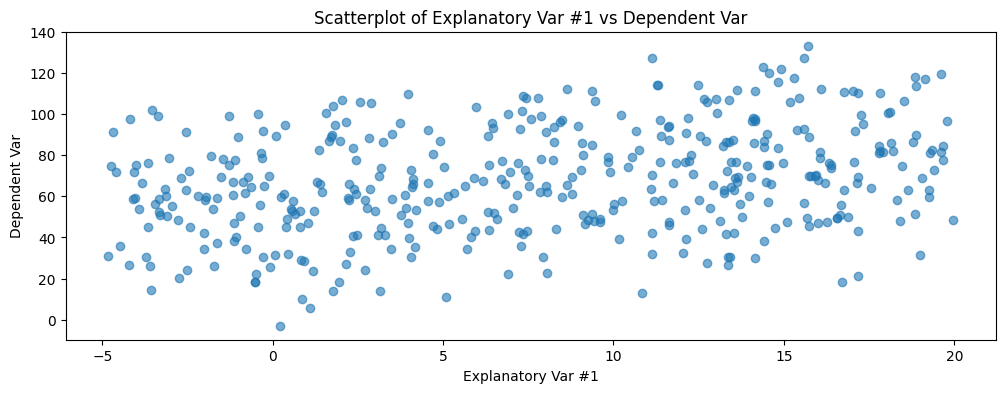

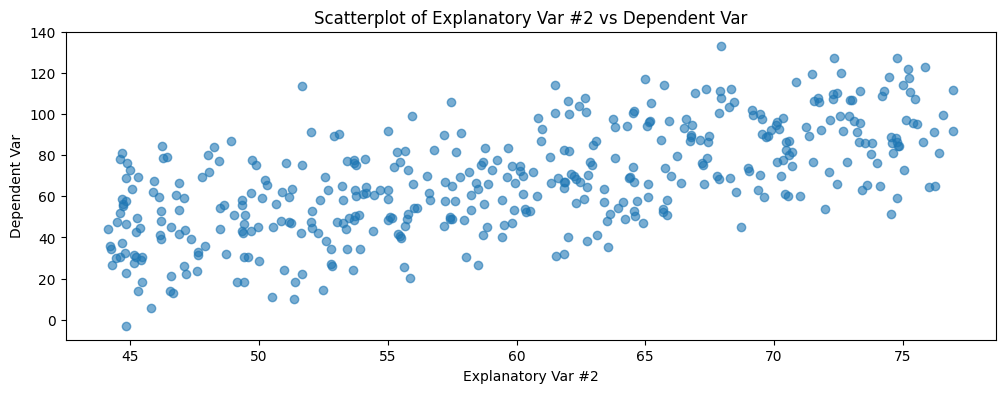

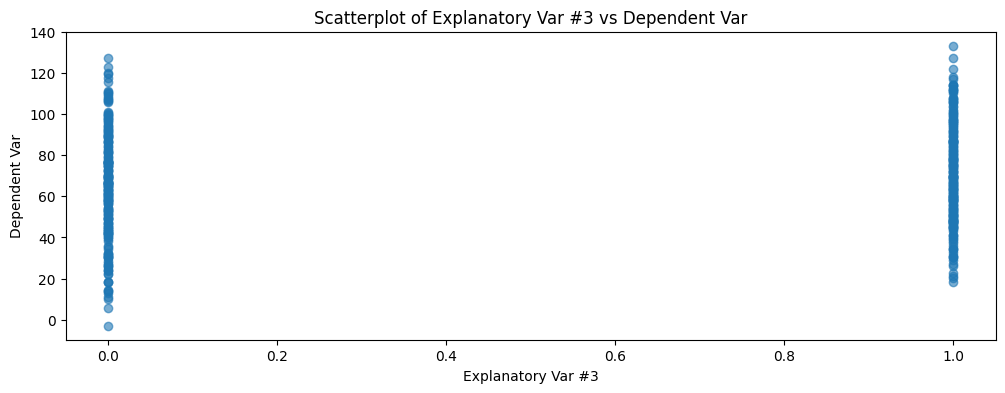

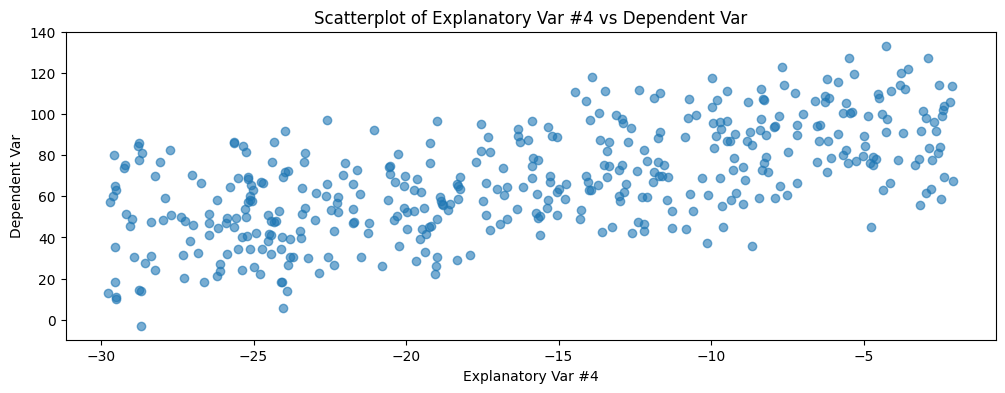

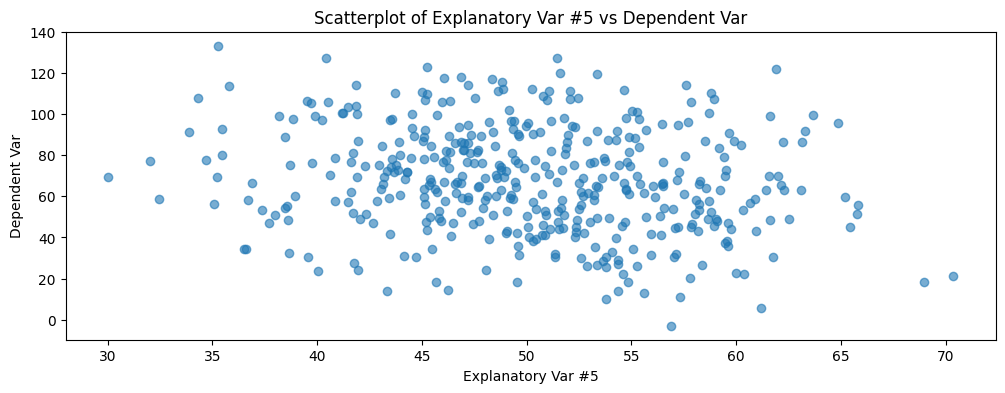

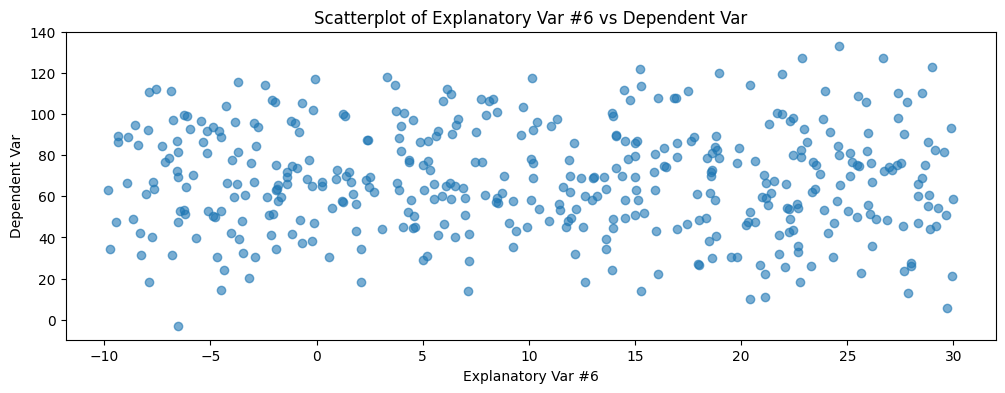

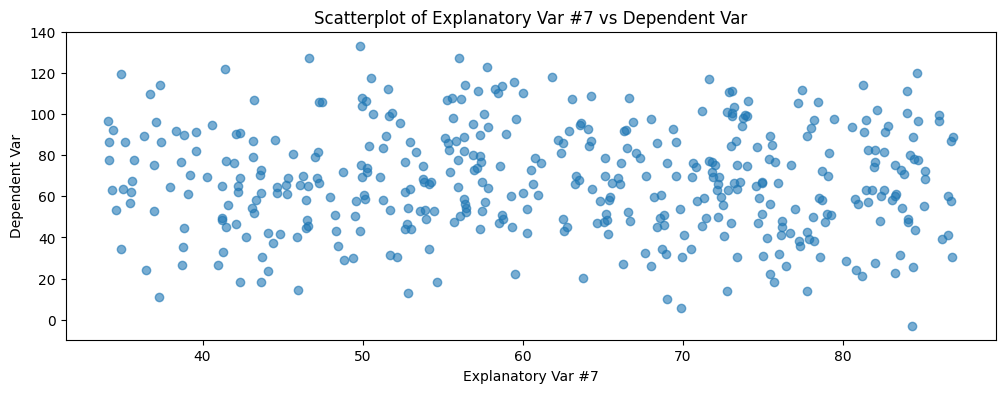

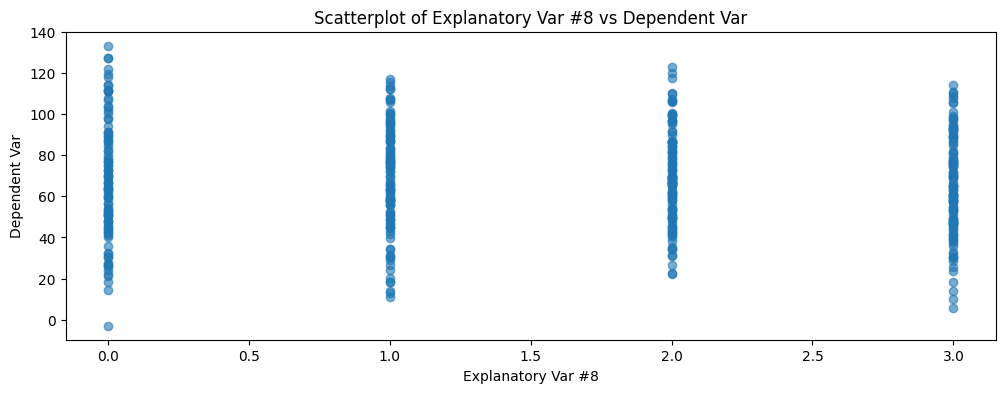

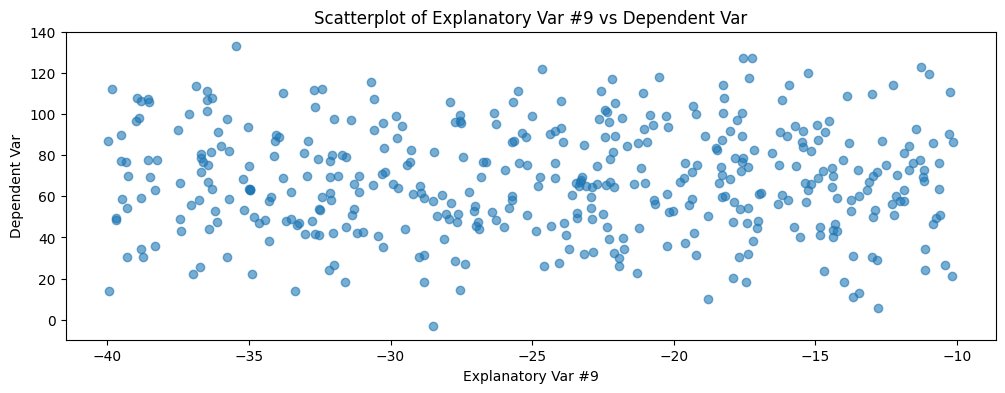

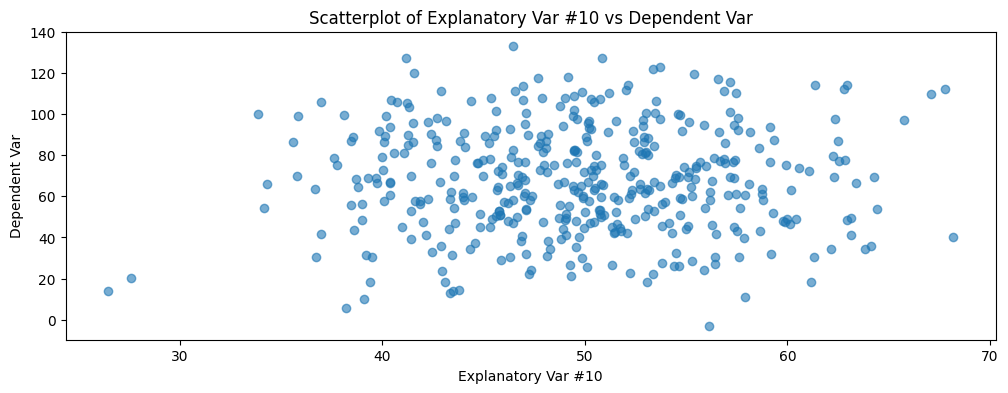

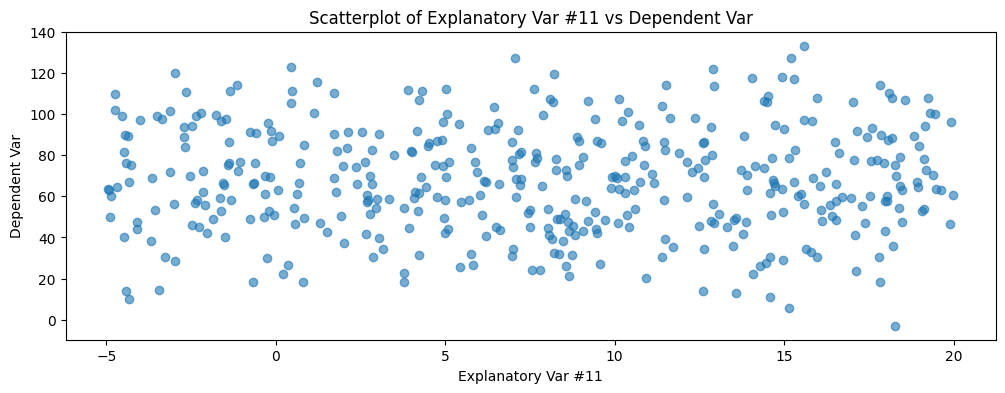

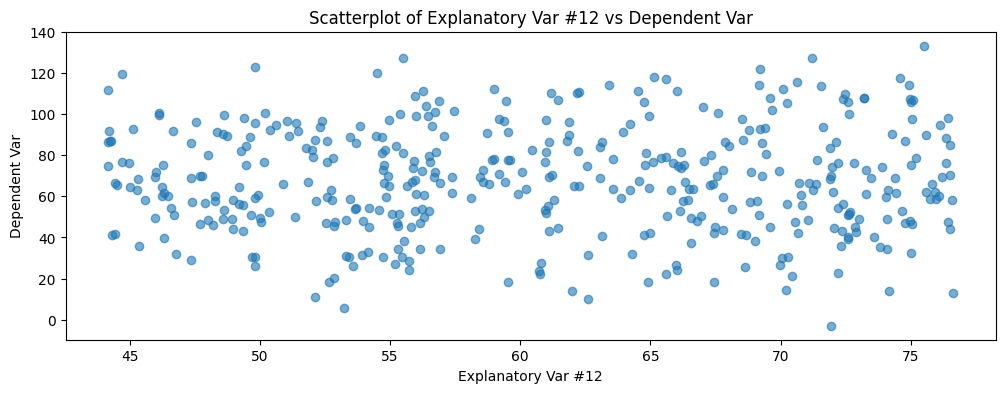

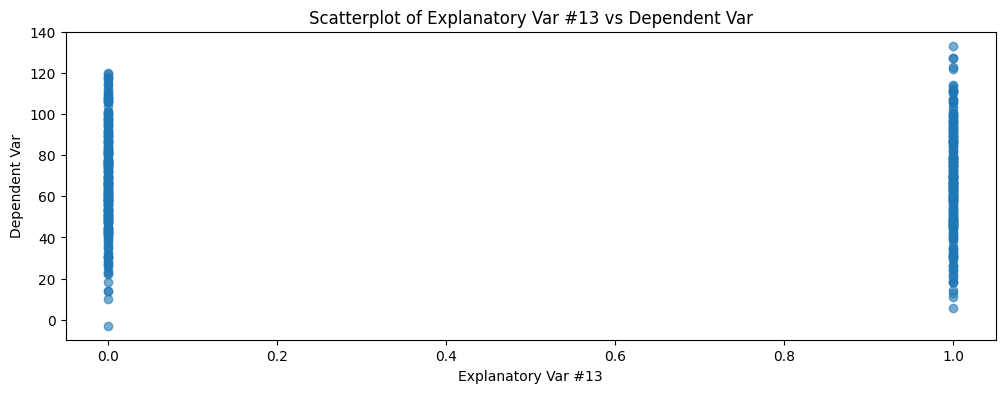

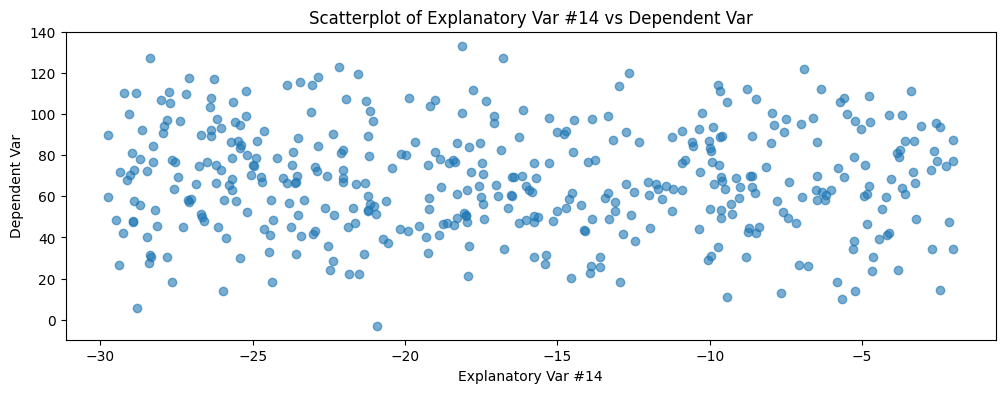

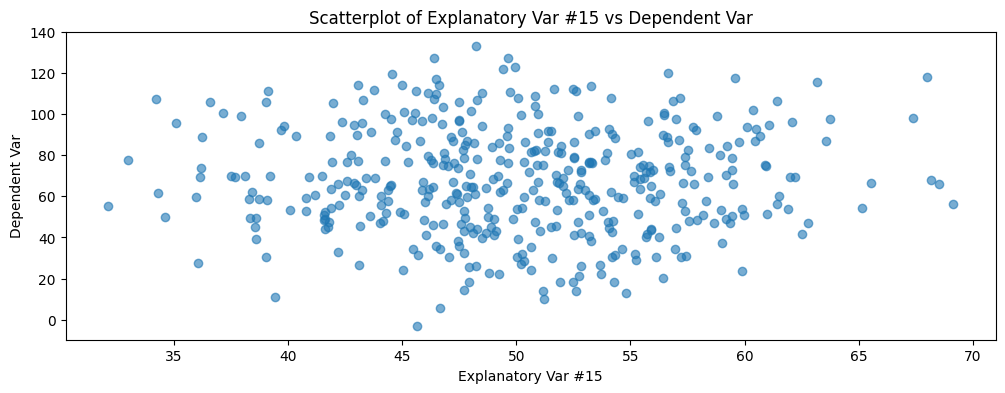

In [33]:
# For each explanatory variable, plot a scatterplot against the dependent variable
for column in explanatory_vars.columns[1:]:  # excluding the constant
    plt.figure(figsize=(12, 4))
    plt.scatter(explanatory_vars[column], dependent_var, alpha=0.6)
    plt.title(f'Scatterplot of {column} vs Dependent Var')
    plt.xlabel(column)
    plt.ylabel('Dependent Var')
    plt.show()

# Part 3

In [39]:
# Split the dataset into two as the training and test sets (test size = 0.5)
X = data.drop("Dependent Var", axis=1)
y = data["Dependent Var"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=111) 

In [52]:
# Run the Lasso model with alpha=1 and estimate the coefficients using the training set
lasso = Lasso(alpha=1) 
lasso.fit(X_train, y_train) 

coefficients = lasso.coef_
print(coefficients)

[ 1.27002365  1.70211159  2.17355794  2.08576611 -0.90987058 -0.
 -0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.        ]


In [53]:
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Explanatory Var #1: 1.270023651668817
Explanatory Var #2: 1.7021115868384509
Explanatory Var #3: 2.173557940750209
Explanatory Var #4: 2.0857661136563896
Explanatory Var #5: -0.9098705825805319
Explanatory Var #6: -0.0
Explanatory Var #7: -0.0
Explanatory Var #8: -0.0
Explanatory Var #9: 0.0
Explanatory Var #10: 0.0
Explanatory Var #11: 0.0
Explanatory Var #12: 0.0
Explanatory Var #13: -0.0
Explanatory Var #14: -0.0
Explanatory Var #15: -0.0


In [54]:
# Then, calculate the mean absolute percentage error using the test set
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


y_pred = lasso.predict(X_test)


mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)

3.5818961897883783


In [56]:
#Find an approximate value for alpha that minimizes the mean absolute percentage error.

alphas = np.logspace(-6, 6, 1000)  

lasso_cv = LassoCV(alphas=alphas, cv=5)  
lasso_cv.fit(X_train, y_train)


best_alpha = lasso_cv.alpha_
print(best_alpha)


y_pred_cv = lasso_cv.predict(X_test)
mape_best = mean_absolute_percentage_error(y_test, y_pred_cv)
print(mape_best)

1e-06
6.085005628126596e-05


# Part 4

In [6]:
data_d = {'Month': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
          'Demand': [100,112,107,103,91,85,84,85,79,81,134,86,99,89,111,114,118,163,193,143,144,202,158,160,144],
          'Advance demand':[71,30,75,64,41,51,42,51,57,49,134,52,99,56,81,79,73,163,193,99,91,202,105,101,96]}
df = pd.DataFrame(data_d)
print(df)

    Month  Demand  Advance demand
0       1     100              71
1       2     112              30
2       3     107              75
3       4     103              64
4       5      91              41
5       6      85              51
6       7      84              42
7       8      85              51
8       9      79              57
9      10      81              49
10     11     134             134
11     12      86              52
12     13      99              99
13     14      89              56
14     15     111              81
15     16     114              79
16     17     118              73
17     18     163             163
18     19     193             193
19     20     143              99
20     21     144              91
21     22     202             202
22     23     158             105
23     24     160             101
24     25     144              96
